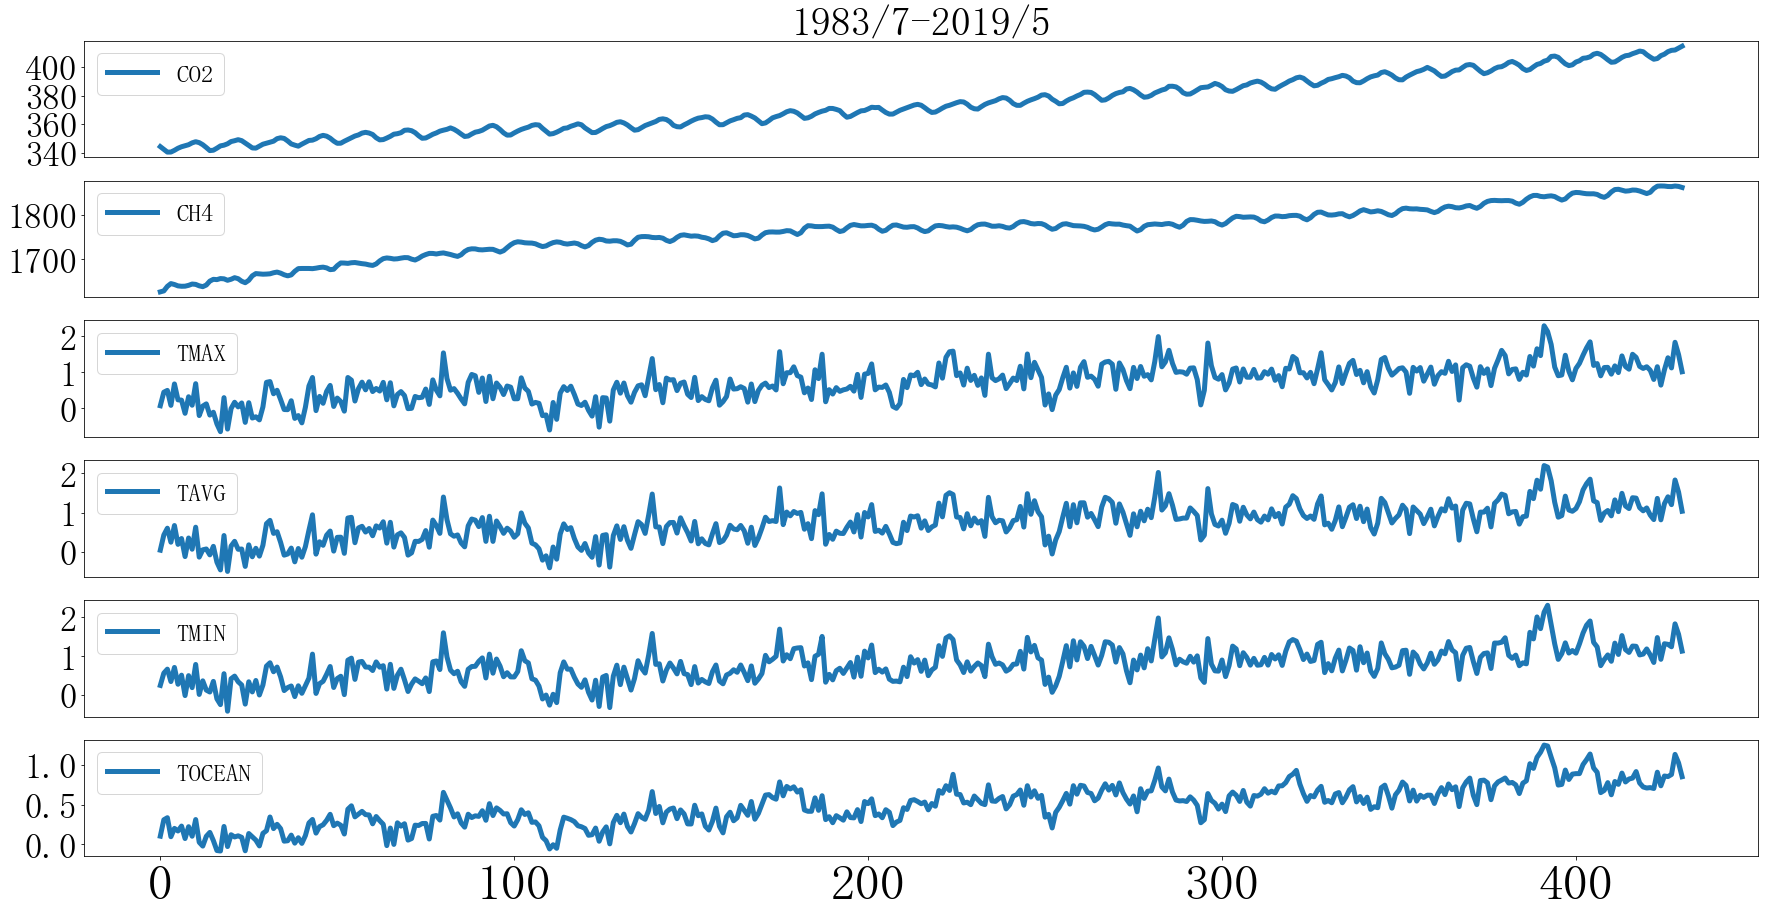

In [1]:
from pandas import read_csv
from matplotlib import pyplot
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib
import matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline
# load dataset
dataset = read_csv('data.csv', header=0)
# print(dataset.values[:,0])

# month=dataset.values[:,0]
month=list(map(str,dataset.values[:,0]))
# print(month)
# print(type(month[0]))
values = dataset.values

# specify columns to plot
groups = list(range(1,len(dataset.columns)))
i = 1
# plot each column

start = datetime.datetime(1983, 7, 1)
end = datetime.datetime(2019, 5, 1)
# 设置日期的间隔为1
delta = datetime.timedelta(days=30.4)
 
# 生成一个matplotlib可以识别的日期对象
dates = mpl.dates.drange(start, end, delta)
# print(dates)

fig= pyplot.figure(figsize = (30,15))
for group in groups:
    
    plt.subplot(len(groups),1,i)
    i=i+1
    
    if i==2:
        plt.title("1983/7-2019/5",fontsize=40)
    if i!=len(groups)+1:
        plt.xticks([])
    else:
        pass
        
#         pyplot.plot(month,values[:, group])
#     else:
    plt.xticks(fontsize=50)
    plt.yticks(fontsize=35)

    pyplot.plot(values[:, group],linewidth=5,label=dataset.columns[group])
    plt.legend(prop={'size':25})
#     pyplot.title(dataset.columns[group], loc='center')
    
#     pyplot.xlabel("time")
#     pyplot.ylabel("value",fontsize=25)
#     pyplot.xticks(rotation=90,fontsize=4)

pyplot.savefig("truth.png",dpi=240)
#     pyplot.show()

In [2]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# 转换序列成监督学习问题
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
#     print(n_vars)
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

def series_to_supervised(data, n_in=1, n_out=1,y_columns=[0],dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
#     print(n_vars)
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df[y_columns].shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in y_columns]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# 加载数据集
dataset = read_csv('data.csv', header=0)
values = dataset.values[:,1:]
feature=values.shape[1]

# print(values)
# # 整数编码
# encoder = LabelEncoder()
# values[:,4] = encoder.fit_transform(values[:,4])
# # ensure all data is float
# values = values.astype('float32')

# 归一化特征
scaler = MinMaxScaler(feature_range=(0, 1,2,3,4))
scaled = scaler.fit_transform(values)
# scaled=values

# 构建监督学习问题
n_in=60
reframed = series_to_supervised(scaled, n_in, 1,y_columns=list(range(feature)))
print(reframed.head(5))
# 分割为训练集和测试集
values = reframed.values

n_train_hours = 300
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# 分为输入输出
train_X, train_y = train[:, :-feature], train[:, -feature:]
print(-values.shape[1])
test_X, test_y = test[:, :-feature], test[:, -feature:]
# 重塑成3D形状 [样例, 时间步, 特征]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

Using TensorFlow backend.


    var1(t-60)  var2(t-60)  var3(t-60)  var4(t-60)  var5(t-60)  var6(t-60)  \
60    0.051675    0.000000    0.244801    0.200890    0.243947    0.140285   
61    0.025838    0.009155    0.372656    0.344329    0.359868    0.294824   
62    0.000000    0.052018    0.389703    0.408451    0.397285    0.314329   
63    0.000404    0.078236    0.248210    0.276130    0.280264    0.135034   
64    0.016687    0.069496    0.450733    0.433655    0.413426    0.213803   

    var1(t-59)  var2(t-59)  var3(t-59)  var4(t-59)  ...  var3(t-1)  var4(t-1)  \
60    0.025838    0.009155    0.372656    0.344329  ...   0.471190   0.405486   
61    0.000000    0.052018    0.389703    0.408451  ...   0.378793   0.336916   
62    0.000404    0.078236    0.248210    0.276130  ...   0.407433   0.430319   
63    0.016687    0.069496    0.450733    0.433655  ...   0.383225   0.409563   
64    0.036334    0.056596    0.300375    0.255374  ...   0.465394   0.469236   

    var5(t-1)  var6(t-1)   var1(t)   var2(t)

Train on 371 samples, validate on 71 samples
Epoch 1/400
 - 2s - loss: 0.4834 - val_loss: 0.6002
Epoch 2/400
 - 0s - loss: 0.3447 - val_loss: 0.2736
Epoch 3/400
 - 0s - loss: 0.1754 - val_loss: 0.1297
Epoch 4/400
 - 0s - loss: 0.1255 - val_loss: 0.2242
Epoch 5/400
 - 0s - loss: 0.1351 - val_loss: 0.1889
Epoch 6/400
 - 0s - loss: 0.1145 - val_loss: 0.1156
Epoch 7/400
 - 0s - loss: 0.1044 - val_loss: 0.1383
Epoch 8/400
 - 0s - loss: 0.1004 - val_loss: 0.1416
Epoch 9/400
 - 0s - loss: 0.0922 - val_loss: 0.0880
Epoch 10/400
 - 0s - loss: 0.0852 - val_loss: 0.1148
Epoch 11/400
 - 0s - loss: 0.0833 - val_loss: 0.0840
Epoch 12/400
 - 0s - loss: 0.0795 - val_loss: 0.0831
Epoch 13/400
 - 0s - loss: 0.0777 - val_loss: 0.0750
Epoch 14/400
 - 0s - loss: 0.0745 - val_loss: 0.0709
Epoch 15/400
 - 0s - loss: 0.0724 - val_loss: 0.0739
Epoch 16/400
 - 0s - loss: 0.0699 - val_loss: 0.0764
Epoch 17/400
 - 0s - loss: 0.0695 - val_loss: 0.0684
Epoch 18/400
 - 0s - loss: 0.0681 - val_loss: 0.0720
Epoch 19/4

Epoch 154/400
 - 0s - loss: 0.0480 - val_loss: 0.0505
Epoch 155/400
 - 0s - loss: 0.0458 - val_loss: 0.0511
Epoch 156/400
 - 0s - loss: 0.0467 - val_loss: 0.0532
Epoch 157/400
 - 0s - loss: 0.0488 - val_loss: 0.0587
Epoch 158/400
 - 0s - loss: 0.0489 - val_loss: 0.0502
Epoch 159/400
 - 0s - loss: 0.0472 - val_loss: 0.0526
Epoch 160/400
 - 0s - loss: 0.0465 - val_loss: 0.0513
Epoch 161/400
 - 0s - loss: 0.0475 - val_loss: 0.0501
Epoch 162/400
 - 0s - loss: 0.0482 - val_loss: 0.0551
Epoch 163/400
 - 0s - loss: 0.0462 - val_loss: 0.0477
Epoch 164/400
 - 0s - loss: 0.0454 - val_loss: 0.0688
Epoch 165/400
 - 0s - loss: 0.0495 - val_loss: 0.0524
Epoch 166/400
 - 0s - loss: 0.0493 - val_loss: 0.0476
Epoch 167/400
 - 0s - loss: 0.0479 - val_loss: 0.0507
Epoch 168/400
 - 0s - loss: 0.0475 - val_loss: 0.0539
Epoch 169/400
 - 0s - loss: 0.0458 - val_loss: 0.0552
Epoch 170/400
 - 0s - loss: 0.0501 - val_loss: 0.0560
Epoch 171/400
 - 0s - loss: 0.0501 - val_loss: 0.0560
Epoch 172/400
 - 0s - loss: 

Epoch 306/400
 - 0s - loss: 0.0405 - val_loss: 0.0542
Epoch 307/400
 - 0s - loss: 0.0397 - val_loss: 0.0634
Epoch 308/400
 - 0s - loss: 0.0473 - val_loss: 0.0496
Epoch 309/400
 - 0s - loss: 0.0373 - val_loss: 0.0485
Epoch 310/400
 - 0s - loss: 0.0350 - val_loss: 0.0410
Epoch 311/400
 - 0s - loss: 0.0375 - val_loss: 0.0436
Epoch 312/400
 - 0s - loss: 0.0356 - val_loss: 0.0507
Epoch 313/400
 - 0s - loss: 0.0375 - val_loss: 0.0444
Epoch 314/400
 - 0s - loss: 0.0353 - val_loss: 0.0392
Epoch 315/400
 - 0s - loss: 0.0334 - val_loss: 0.0386
Epoch 316/400
 - 0s - loss: 0.0329 - val_loss: 0.0378
Epoch 317/400
 - 0s - loss: 0.0316 - val_loss: 0.0388
Epoch 318/400
 - 0s - loss: 0.0330 - val_loss: 0.0392
Epoch 319/400
 - 0s - loss: 0.0327 - val_loss: 0.0394
Epoch 320/400
 - 0s - loss: 0.0326 - val_loss: 0.0404
Epoch 321/400
 - 0s - loss: 0.0320 - val_loss: 0.0368
Epoch 322/400
 - 0s - loss: 0.0310 - val_loss: 0.0367
Epoch 323/400
 - 0s - loss: 0.0334 - val_loss: 0.0405
Epoch 324/400
 - 0s - loss: 

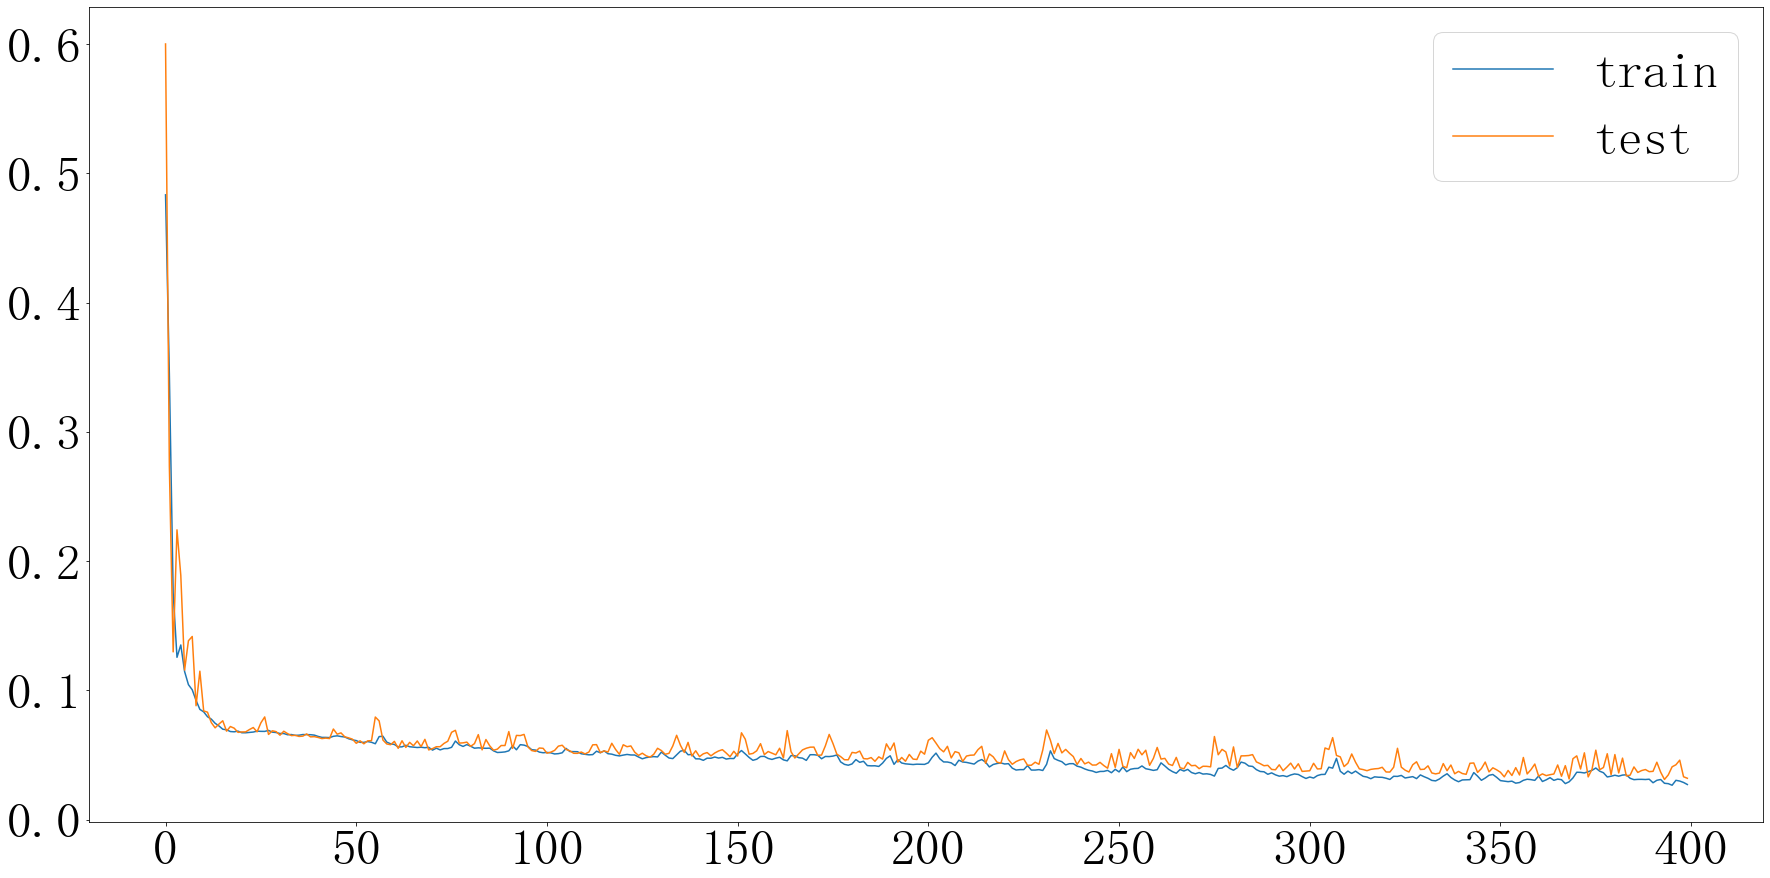

In [7]:
# 设计网络
model2 = Sequential()
model2.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model2.add(LSTM(200,return_sequences=True))
# model.add(LSTM(200,return_sequences=True))
model2.add(LSTM(100,return_sequences=False))
model2.add(Dense(100))
model2.add(Dense(feature))
model2.compile(loss='mae', optimizer='adam')
# 拟合神经网络模型
history = model2.fit(np.vstack((train_X,test_X)), np.vstack((train_y,test_y)), epochs=400, batch_size=100, validation_data=(test_X, test_y), verbose=2, shuffle=True)
# 绘制训练测试误差图
fig= pyplot.figure(figsize = (30,15))
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.legend(prop={'size':50})

# plt.savefig('loss.png')
pyplot.show()

In [8]:
#预测未来25年
alltime=12*25
# test_25=test_X[-1:,:]
# print(test_25)

pred_x=test_y[-n_in:,:].reshape(1,1,n_in*feature)
print(pred_x.shape)
import copy

# print(pred_y[-1,:].shape)
pred_y=np.zeros((1,feature))
for i in range(alltime):
    tmp=model2.predict(pred_x)
    pred_x[0,0,:-feature]=pred_x[0,0,feature:]
    pred_x[0,0,-feature:]=copy.deepcopy(tmp[0,:])
#     print(pred_y.shape,tmp.shape)
    pred_y=np.vstack((pred_y,copy.deepcopy(tmp)))
    
pred_y=pred_y[1:,:]
print(pred_y.shape)
print(pred_y)
    

#     pre=pre.reshape(1,1,(pre.shape[-1]))
#     pred_y=np.vstack((pred_y,pre))
    

(1, 1, 360)
(300, 6)
[[0.98267961 0.92300165 0.5969438  0.58600426 0.53960979 0.62434977]
 [0.94866222 0.92948842 0.67757958 0.69422621 0.6676814  0.75713253]
 [0.93156028 0.93959439 0.59787613 0.61465073 0.58403027 0.70154768]
 ...
 [1.06564426 1.08133638 0.70733827 0.75650615 0.73997307 0.86615306]
 [1.06380796 1.0806632  0.69205189 0.7394042  0.72470111 0.84777856]
 [1.06079102 1.08145428 0.66815001 0.71490377 0.70240772 0.82567298]]


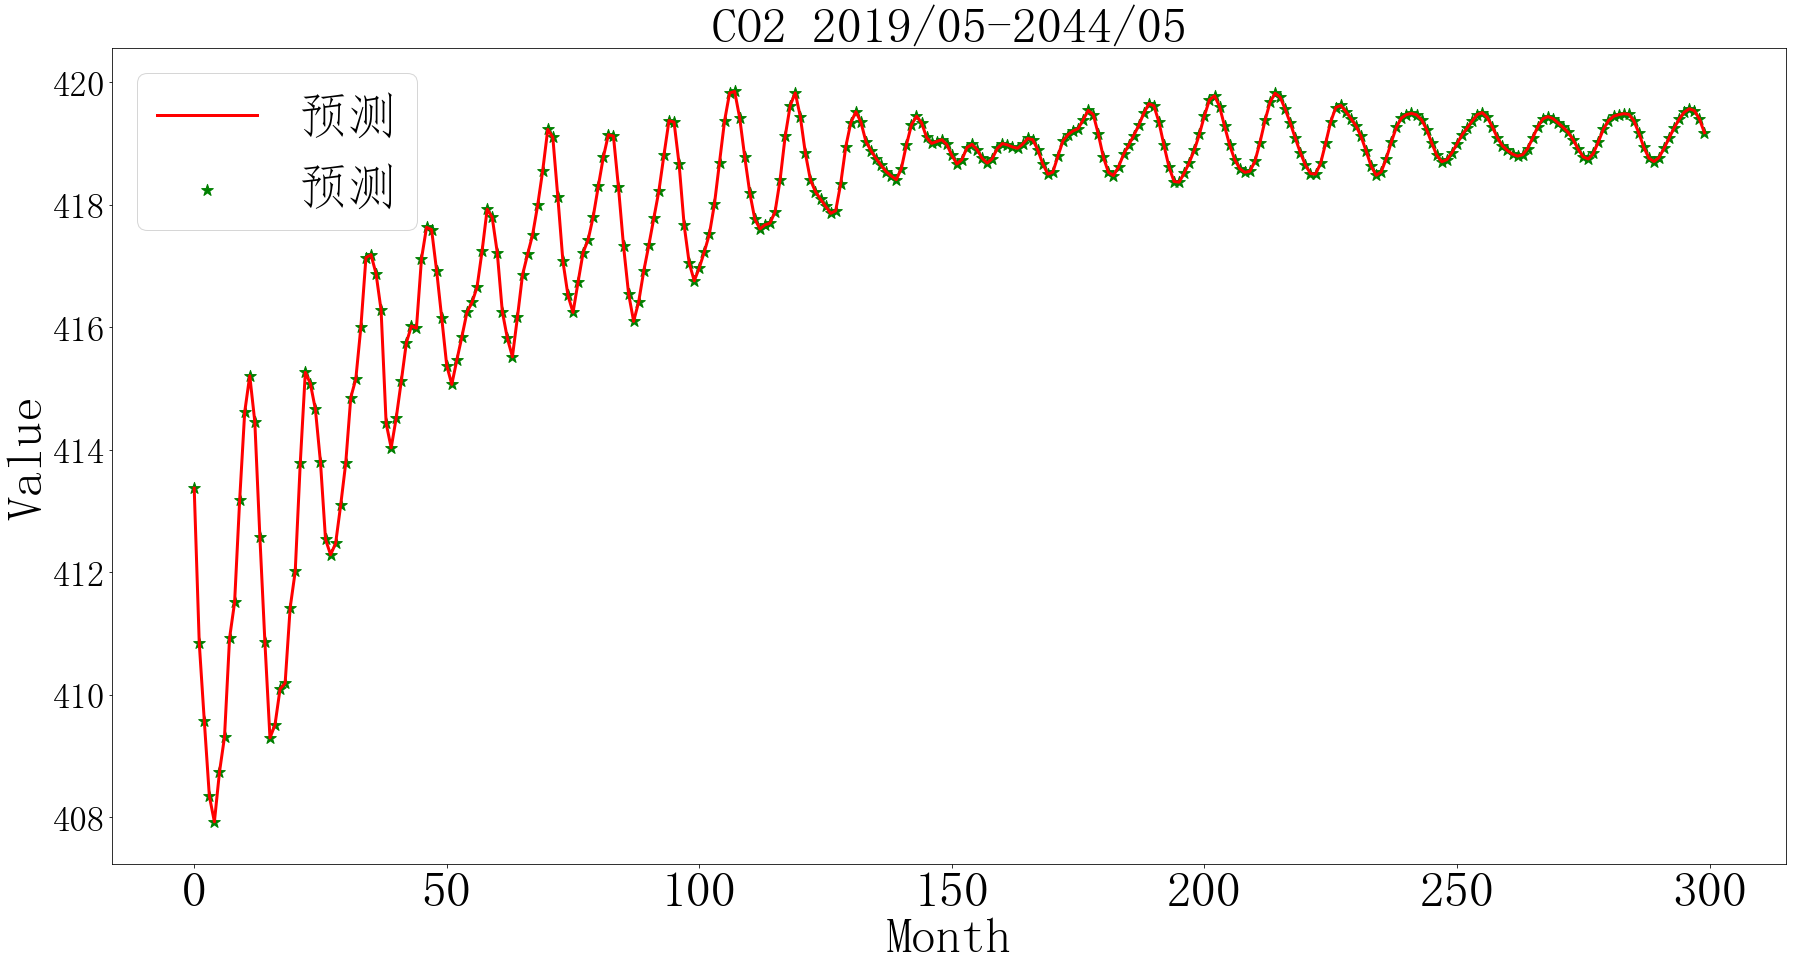

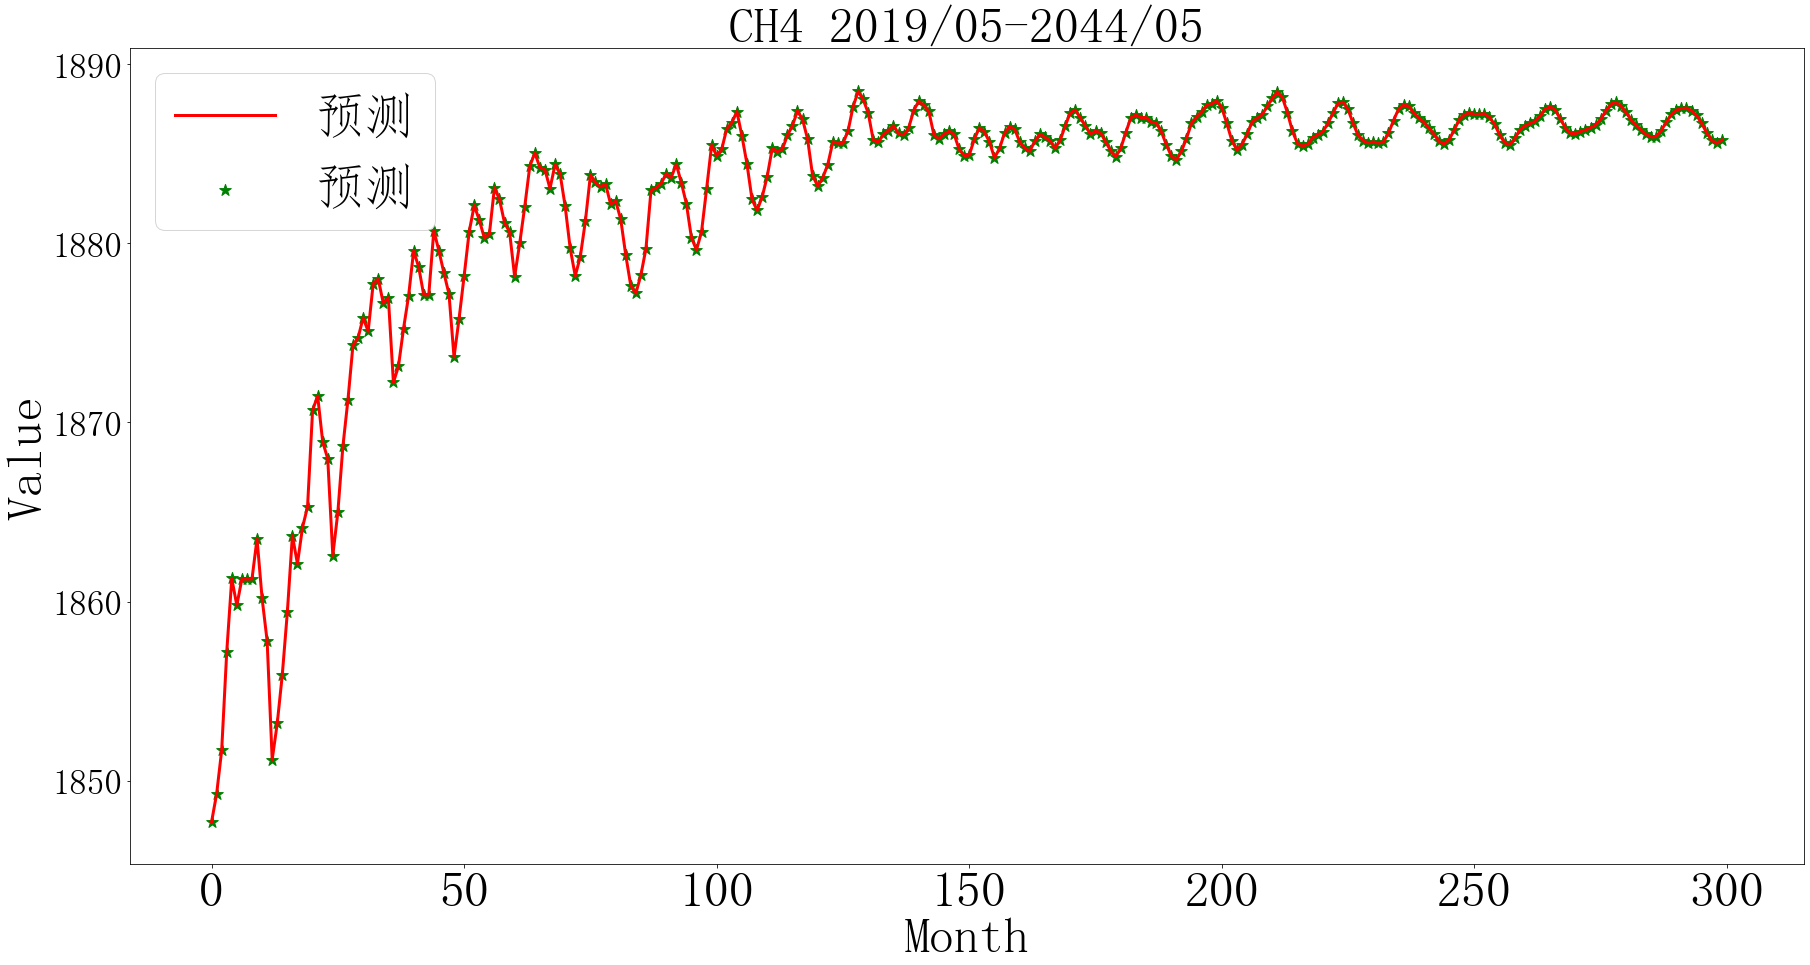

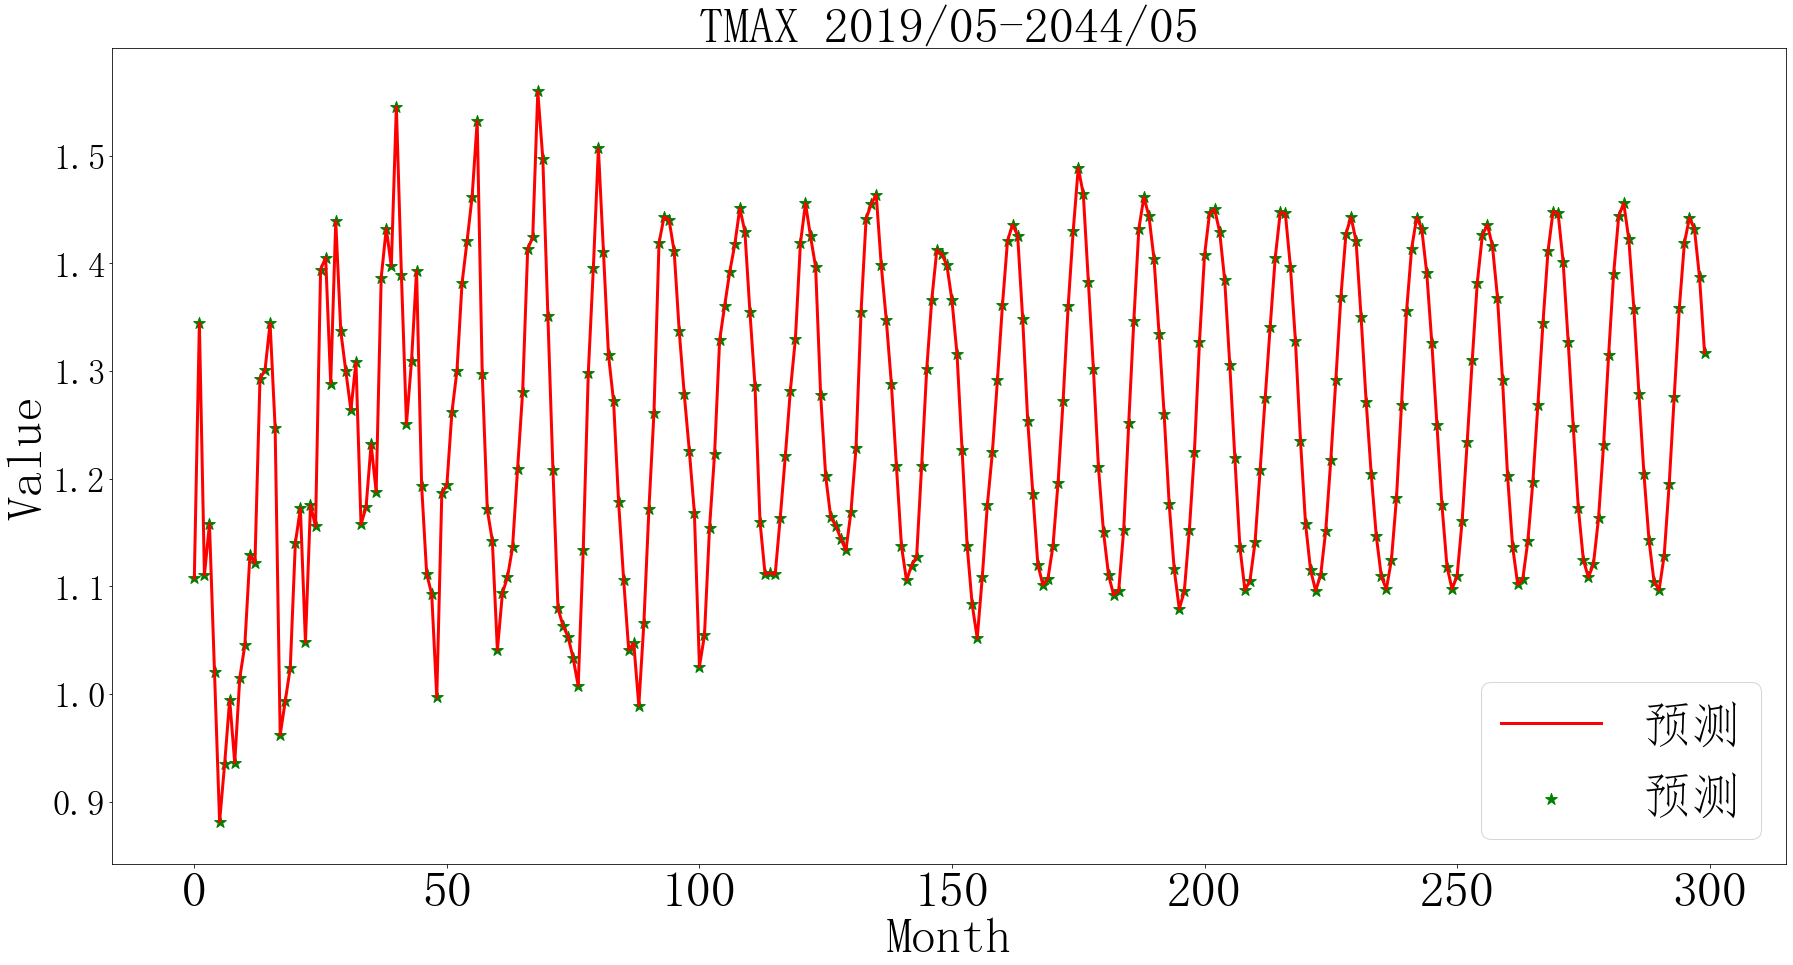

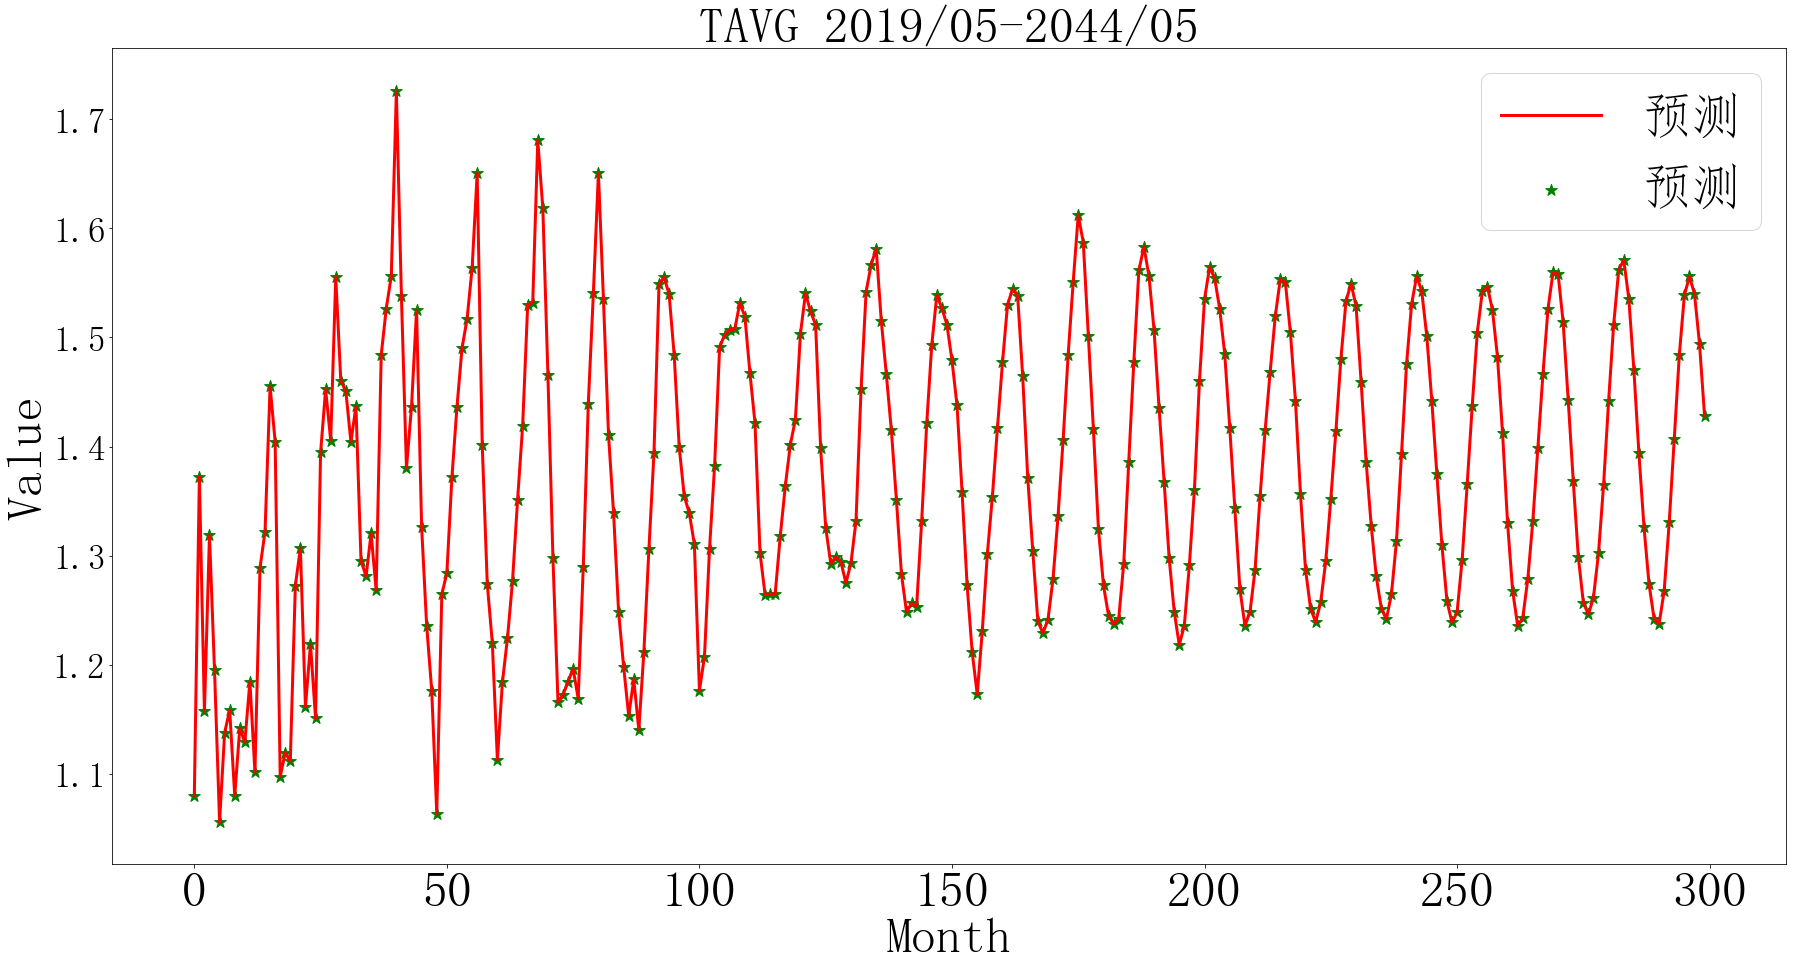

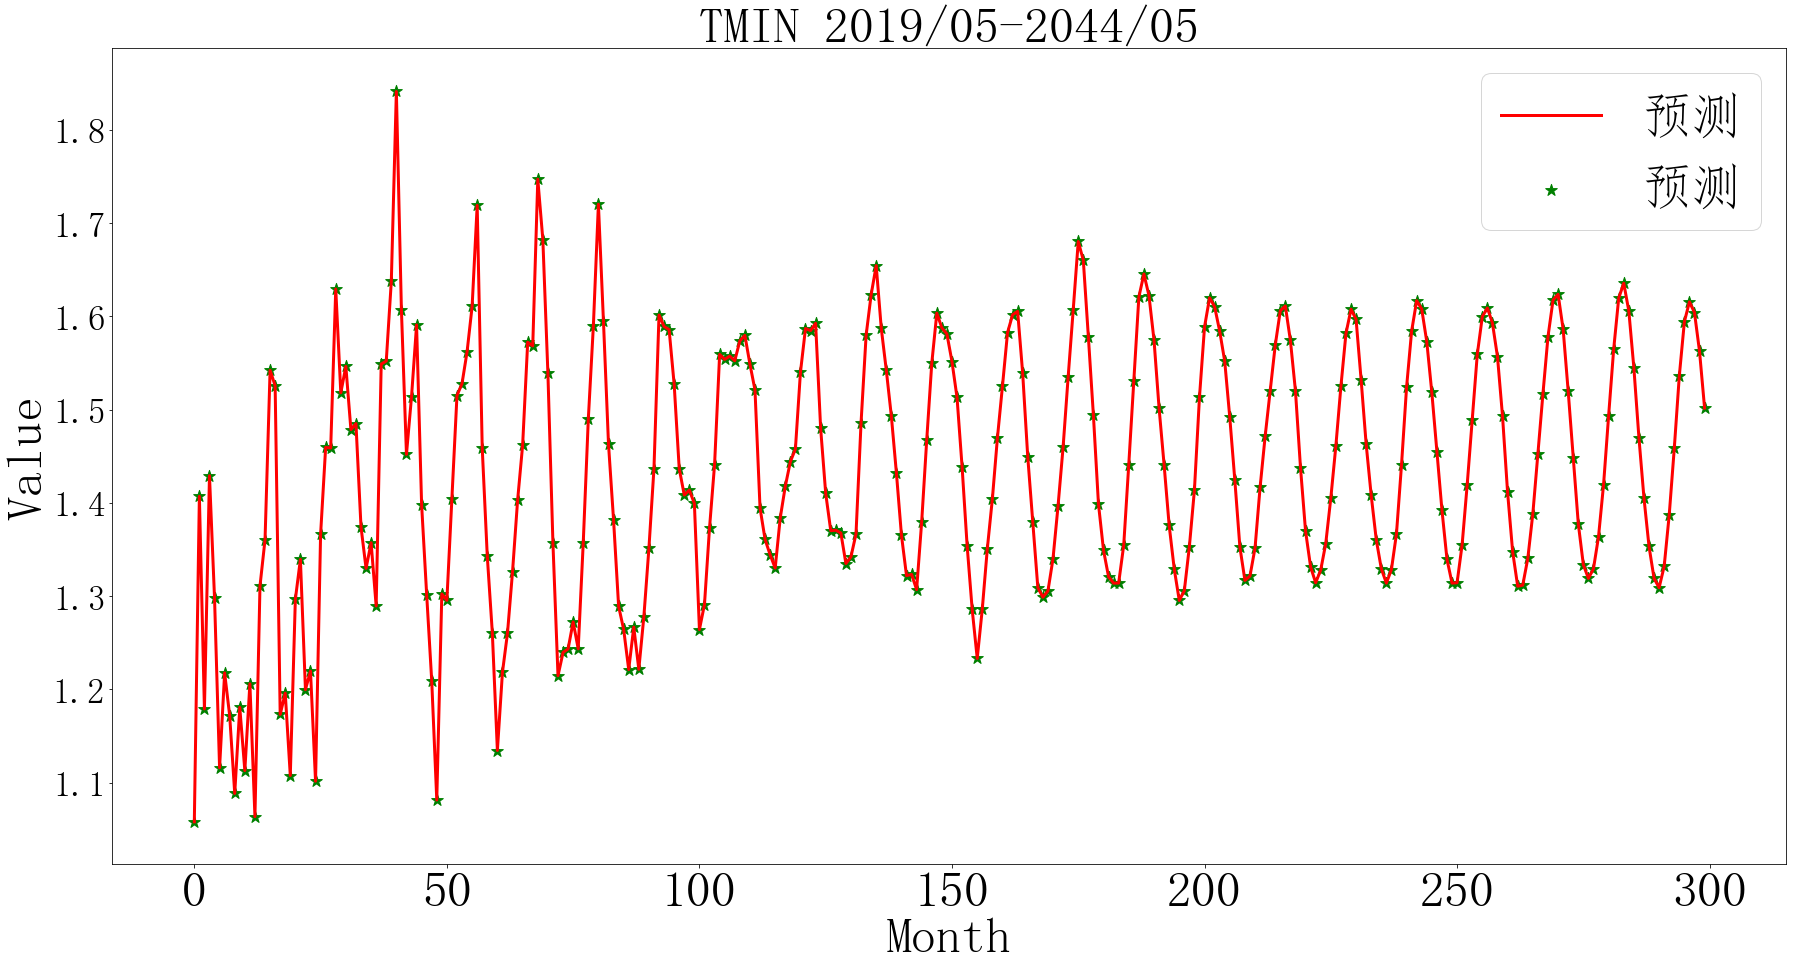

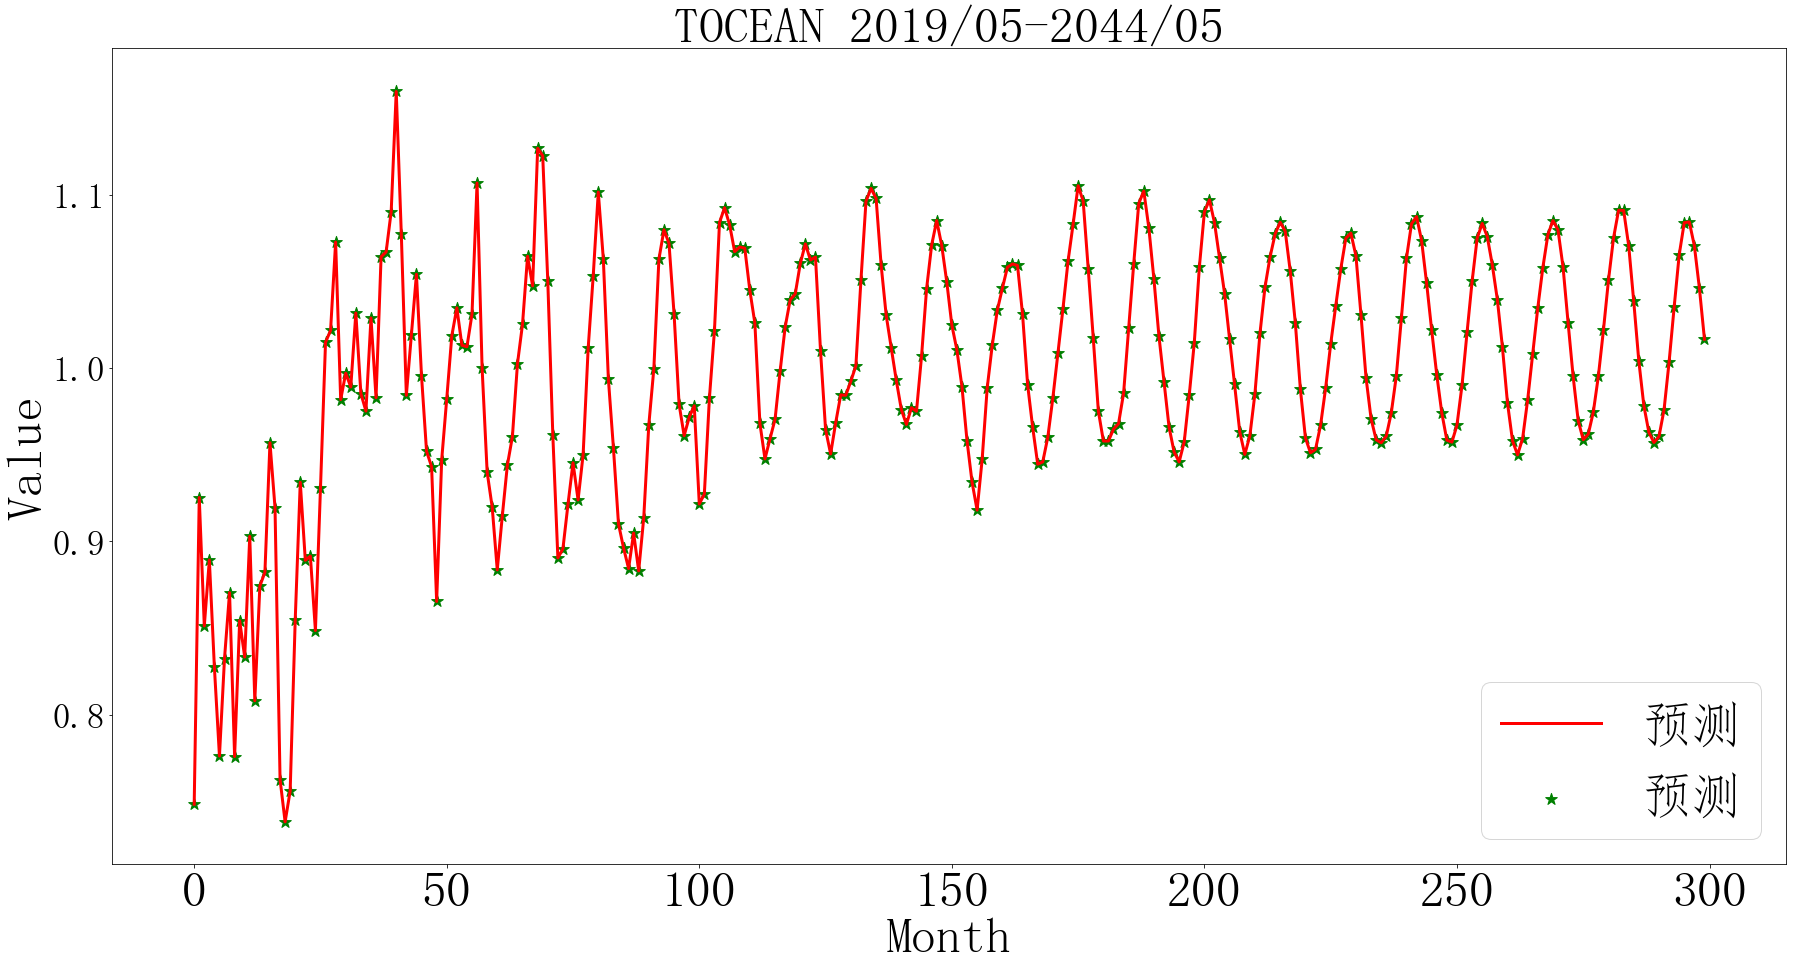

In [9]:


inv_pred_y = scaler.inverse_transform(pred_y)
x=np.zeros((len(inv_pred_y),1))
for i in range(len(x)):
    x[i]=i
           

for i in groups:
    # 绘制历史数据和预测数据图
    
    fig= pyplot.figure(figsize = (30,15))
    plt.plot(inv_pred_y[:,i-1],label='预测',c='r',linestyle='-', linewidth=3)
    plt.scatter(x,inv_pred_y[:,i-1],label='预测',c='g',linestyle='-', marker='*',s=150)
    plt.legend(prop={'size':50})
    
    plt.title('{} 2019/05-2044/05'.format(dataset.columns[i]),fontsize=50)
    plt.xlabel("Month",fontsize=50)
    plt.ylabel("Value",fontsize=50)
    plt.xticks(fontsize=50)
    plt.yticks(fontsize=35)
#     plt.title(fontdict=50)
    plt.savefig('{}25year.png'.format(dataset.columns[i]),dpi=200)
    plt.show()
    # 计算RMSE
